In [ ]:
from google.colab import files

uploaded = files.upload()

Saving heart.csv to heart.csv


In [ ]:
import pandas as pd
df = pd.read_csv('heart.csv')
df.head(10)

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1
7,44,1,1,120,263,0,1,173,0,0.0,2,0,3,1
8,52,1,2,172,199,1,1,162,0,0.5,2,0,3,1
9,57,1,2,150,168,0,1,174,0,1.6,2,0,2,1


категориальные признаки оставим как есть, так как категории отражают степень заболевания

In [ ]:
#отнормируем числовые и посмотрим на коррреляцию
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# Нормируем признаки 'age', 'trtbps', 'chol' и 'thalachh'
df[['age', 'trtbps', 'chol', 'thalachh']] = scaler.fit_transform(df[['age', 'trtbps', 'chol', 'thalachh']])
df

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,0.952197,1,3,0.763956,-0.256334,1,0,0.015443,0,2.3,0,0,1,1
1,-1.915313,1,2,-0.092738,0.072199,0,1,1.633471,0,3.5,0,0,2,1
2,-1.474158,0,1,-0.092738,-0.816773,0,0,0.977514,0,1.4,2,0,2,1
3,0.180175,1,1,-0.663867,-0.198357,0,1,1.239897,0,0.8,2,0,2,1
4,0.290464,0,0,-0.663867,2.082050,0,1,0.583939,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,0.290464,0,0,0.478391,-0.101730,0,1,-1.165281,1,0.2,1,0,3,0
299,-1.033002,1,3,-1.234996,0.342756,0,1,-0.771706,0,1.2,1,0,3,0
300,1.503641,1,0,0.706843,-1.029353,1,1,-0.378132,0,3.4,1,2,3,0
301,0.290464,1,0,-0.092738,-2.227533,0,1,-1.515125,1,1.2,1,1,3,0


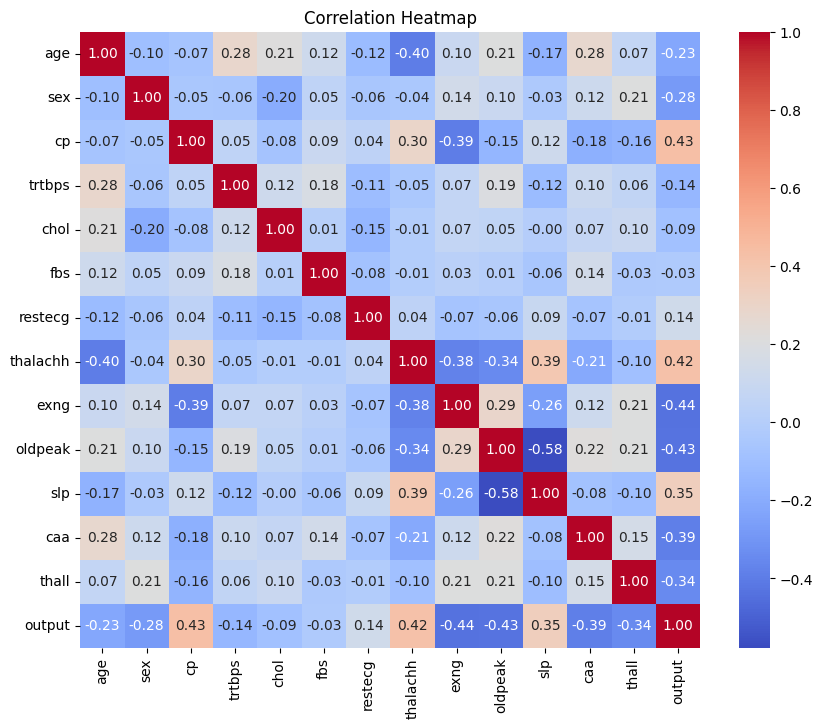

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Создаем матрицу корреляции
corr = df.corr()

# Строим тепловую карту корреляции
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()


уменьшим колличество признаков путем схлопывания признаков с маленькой корреляцией в один признак

In [ ]:
from sklearn.decomposition import PCA

features = ['trtbps', 'chol', 'fbs', 'restecg']
data = df[features]
pca = PCA(n_components=1)
transformed_data = pca.fit_transform(data)
df['pca_feature'] = transformed_data
df.drop(columns=features, inplace=True)
df

,age,sex,cp,thalachh,exng,oldpeak,slp,caa,thall,output,pca_feature
0,0.952197,1,3,0.015443,0,2.3,0,0,1,1,0.459455
1,-1.915313,1,2,1.633471,0,3.5,0,0,2,1,-0.075813
2,-1.474158,0,1,0.977514,0,1.4,2,0,2,1,-0.584171
3,0.180175,1,1,1.239897,0,0.8,2,0,2,1,-0.666729
4,0.290464,0,0,0.583939,1,0.6,2,0,2,1,0.930427
...,...,...,...,...,...,...,...,...,...,...,...
298,0.290464,0,0,-1.165281,1,0.2,1,0,3,0,0.203794
299,-1.033002,1,3,-0.771706,0,1.2,1,0,3,0,-0.689167
300,1.503641,1,0,-0.378132,0,3.4,1,2,3,0,-0.236358
301,0.290464,1,0,-1.515125,1,1.2,1,1,3,0,-1.686504


посмотрим что получилось

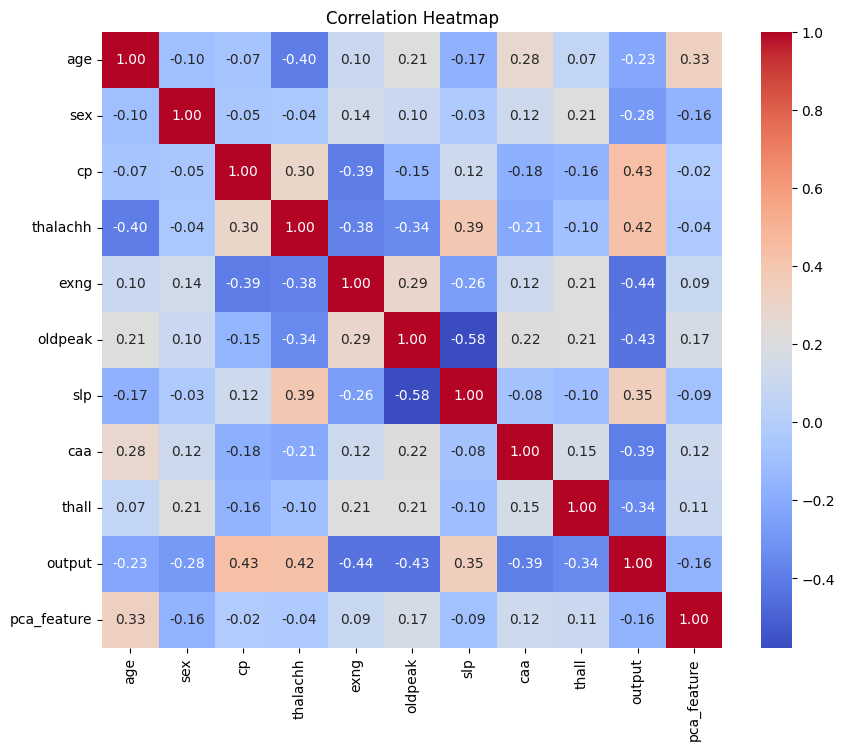

In [ ]:
corr = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

In [ ]:
df['output'].value_counts()

output
1    165
0    138
Name: count, dtype: int64

видим что классы хорошо сбалансированны и дополнительных действий не требуется

начнем с простых линейных моделей

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
import numpy as np

X = df.drop('output', axis=1)
y = df['output']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)

models = {}
models['linear_regression_model'] = model

print("Среднеквадратичная ошибка модели:", mse)

y_pred_rounded = np.round(y_pred)

accuracy = accuracy_score(y_test, y_pred_rounded)

print("Доля правильных ответов (Accuracy):", accuracy)

Среднеквадратичная ошибка модели: 0.11518771845863476
Доля правильных ответов (Accuracy): 0.8688524590163934


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

model = LogisticRegression()

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)

models['logistic_regression_model'] = model

print("Доля правильных ответов модели (Accuracy):", accuracy)


Доля правильных ответов модели (Accuracy): 0.8688524590163934


посмотрим что нам выдаст метод опорных векторов

In [ ]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, GridSearchCV
param_grid = {'C': [0.1, 1, 10, 100]}
svm = SVC(kernel='linear')
grid_search = GridSearchCV(svm, param_grid, cv=5)
grid_search.fit(X_train, y_train)
best_svm = grid_search.best_estimator_
y_pred_svm = best_svm.predict(X_test)
accuracy = accuracy_score(y_test, y_pred_svm)

models['SVM'] = best_svm
print("Точность модели SVM:", accuracy)
print("Лучший гиперпараметр C:", best_svm.get_params()['C'])


Точность модели SVM: 0.8852459016393442
Лучший гиперпараметр C: 10


уже не плохо, посмотрим что нам выдаст случайный лес

In [ ]:
from sklearn.ensemble import RandomForestClassifier
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt']
}

rf = RandomForestClassifier()

grid_search = GridSearchCV(rf, param_grid, cv=5)
grid_search.fit(X_train, y_train)
best_rf = grid_search.best_estimator_

y_pred_rf = best_rf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred_rf)

models['Random Forest'] = best_rf

print("Точность модели случайного леса с наилучшими гиперпараметрами:", accuracy)
print("Наилучшие гиперпараметры для Random Forest:", best_rf.get_params())

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomFor

Точность модели случайного леса с наилучшими гиперпараметрами: 0.8524590163934426
Наилучшие гиперпараметры для Random Forest: {'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': 'auto', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 4, 'min_samples_split': 10, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 200, 'n_jobs': None, 'oob_score': False, 'random_state': None, 'verbose': 0, 'warm_start': False}


случайный лес моих надежд не оправдал

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.3],
    'max_depth': [3, 5, 7],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt']
} #надеюсь ядро не навернется

gb = GradientBoostingClassifier()

grid_search = GridSearchCV(gb, param_grid, cv=5)
grid_search.fit(X_train, y_train)
best_gb = grid_search.best_estimator_

y_pred_gb = best_gb.predict(X_test)
accuracy = accuracy_score(y_test, y_pred_gb)

models['Gradient Boosting'] = best_gb

print("Точность модели градиентного бустинга с наилучшими гиперпараметрами:", accuracy)
print("Наилучшие гиперпараметры для Gradient Boosting:", best_gb.get_params())

Выходные данные были обрезаны до нескольких последних строк (5000).
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly se

Точность модели градиентного бустинга с наилучшими гиперпараметрами: 0.8360655737704918
Наилучшие гиперпараметры для Gradient Boosting: {'ccp_alpha': 0.0, 'criterion': 'friedman_mse', 'init': None, 'learning_rate': 0.01, 'loss': 'log_loss', 'max_depth': 3, 'max_features': 'sqrt', 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 4, 'min_samples_split': 10, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 300, 'n_iter_no_change': None, 'random_state': None, 'subsample': 1.0, 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': 0, 'warm_start': False}


победил метод опорных векторов, видимо данные хорошо линейно разделимы